In [208]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'predicting-pulsar-starintermediate:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F845444%2F1442600%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240316%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240316T113834Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Da7086fceca1b45f04ebc83cc494b6ad17246adc28ee51e42f2f3678246ae11c818f9d97ff4136335a0c2880f6e6e4f02782eafc3336b98cea15887f856e99856c57bd5097fc834e104296ecd5debd2f6bf00295485bcbcdf1fa3cb437044aaf80a94e2a7248f1bd16d39cee32d739f71485b47493239af34ce8e5d097bd0477b0068810ef93940c97361fc7140d4f21d0ba540052f52574280599564a85a42077a77de870855fadf45718c394d196b1a7400861448d8a93df7be2d4a82681cc3f64f3e5b4af02aeb7950718088cfc4cf9acb8d4daf500650d94d86415069b2dc7ef22b58895cb3e3875cb921fee6eebd6dee18224d77ae2715868c2c8e76efbb'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 808689 bytes downloaded
Downloaded and uncompressed: predicting-pulsar-starintermediate
Data source import complete.


# Predicting Pulsar Star

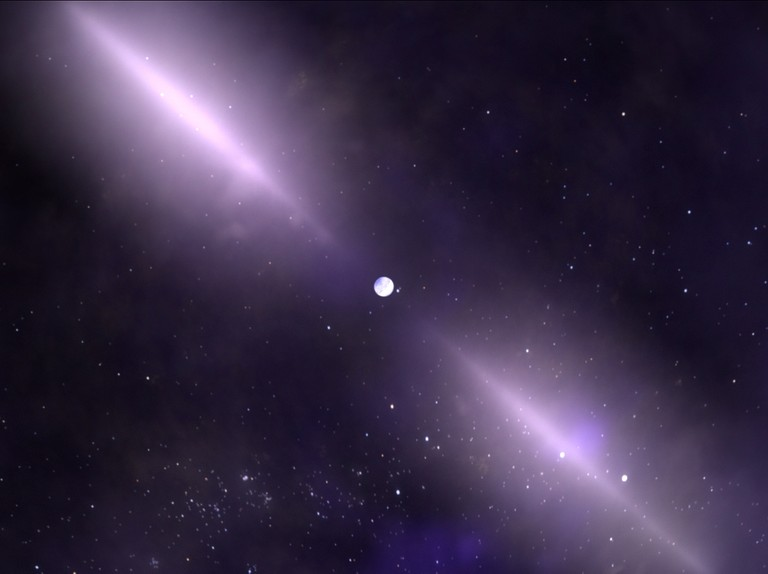

# About Data

Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter. Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification systems in particular are being widely adopted,which treat the candidate data sets as binary classification problems

Features:
Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile (folded profile). This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency . The remaining four variables are similarly obtained from the DM-SNR curve . These are summarised below:

1. Mean of the integrated profile.
2. Standard deviation of the integrated profile.
3. Excess kurtosis of the integrated profile.
4. Skewness of the integrated profile.
5. Mean of the DM-SNR curve.
6. Standard deviation of the DM-SNR curve.
7. Excess kurtosis of the DM-SNR curve.
8. Skewness of the DM-SNR curve.
9. Class




# Import Libraries and Data

In [209]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Deklarasikan data yang akan dipakai sebagai Train dan test

In [210]:
train_data = pd.read_csv("../input/predicting-pulsar-starintermediate/pulsar_data_train.csv")
test_data = pd.read_csv("../input/predicting-pulsar-starintermediate/pulsar_data_test.csv")

Perlihatkan data train

In [211]:
train_data

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0.0
12524,115.617188,46.784600,0.218177,0.226757,6.140468,NaN,5.732201,34.357283,0.0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0.0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0.0


# EDA

Lihat apakah ada data yang kosong (null)

In [212]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


Melihat deskripsi dari data

In [213]:
train_data.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,12528.000000,12528.000000,10793.000000,12528.000000,12528.000000,11350.000000,12528.000000,11903.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,1.064708,6.208450,29.613230,19.610842,4.535783,107.399585,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.024652,-0.188142,1.910535,14.404353,5.803063,35.199899,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.473125,0.932374,5.413253,28.337418,10.727927,139.997850,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


Menunjukan jumlah data yang kosong (null)

In [214]:
train_data.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

Plot heatmap dari data train

<Axes: >

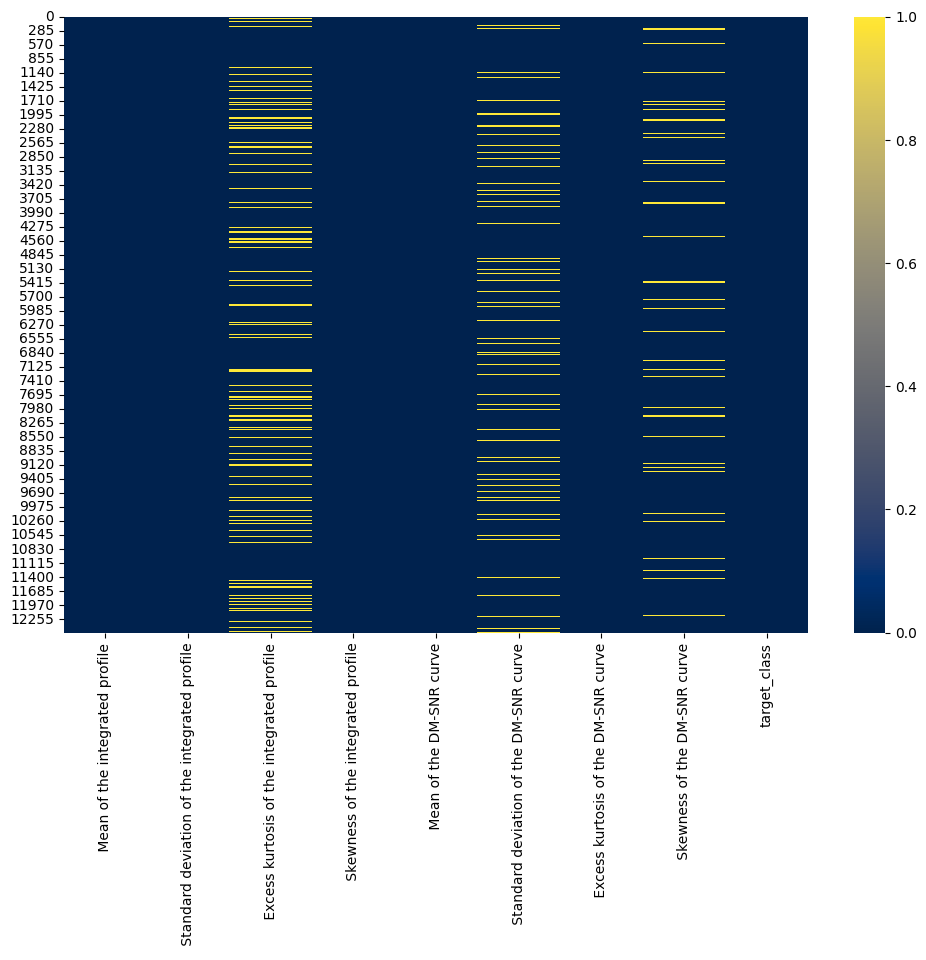

In [215]:
plt.figure(figsize=(12,8))
sns.heatmap(train_data.isnull(),cmap= 'cividis')

Missing values in:


*   Excess kurtosis of the integrated profile
*   Standard deviation of the DM-SNR curve
*   Skewness of the DM-SNR curve





Plot histogram dari setiap data dalam data Train

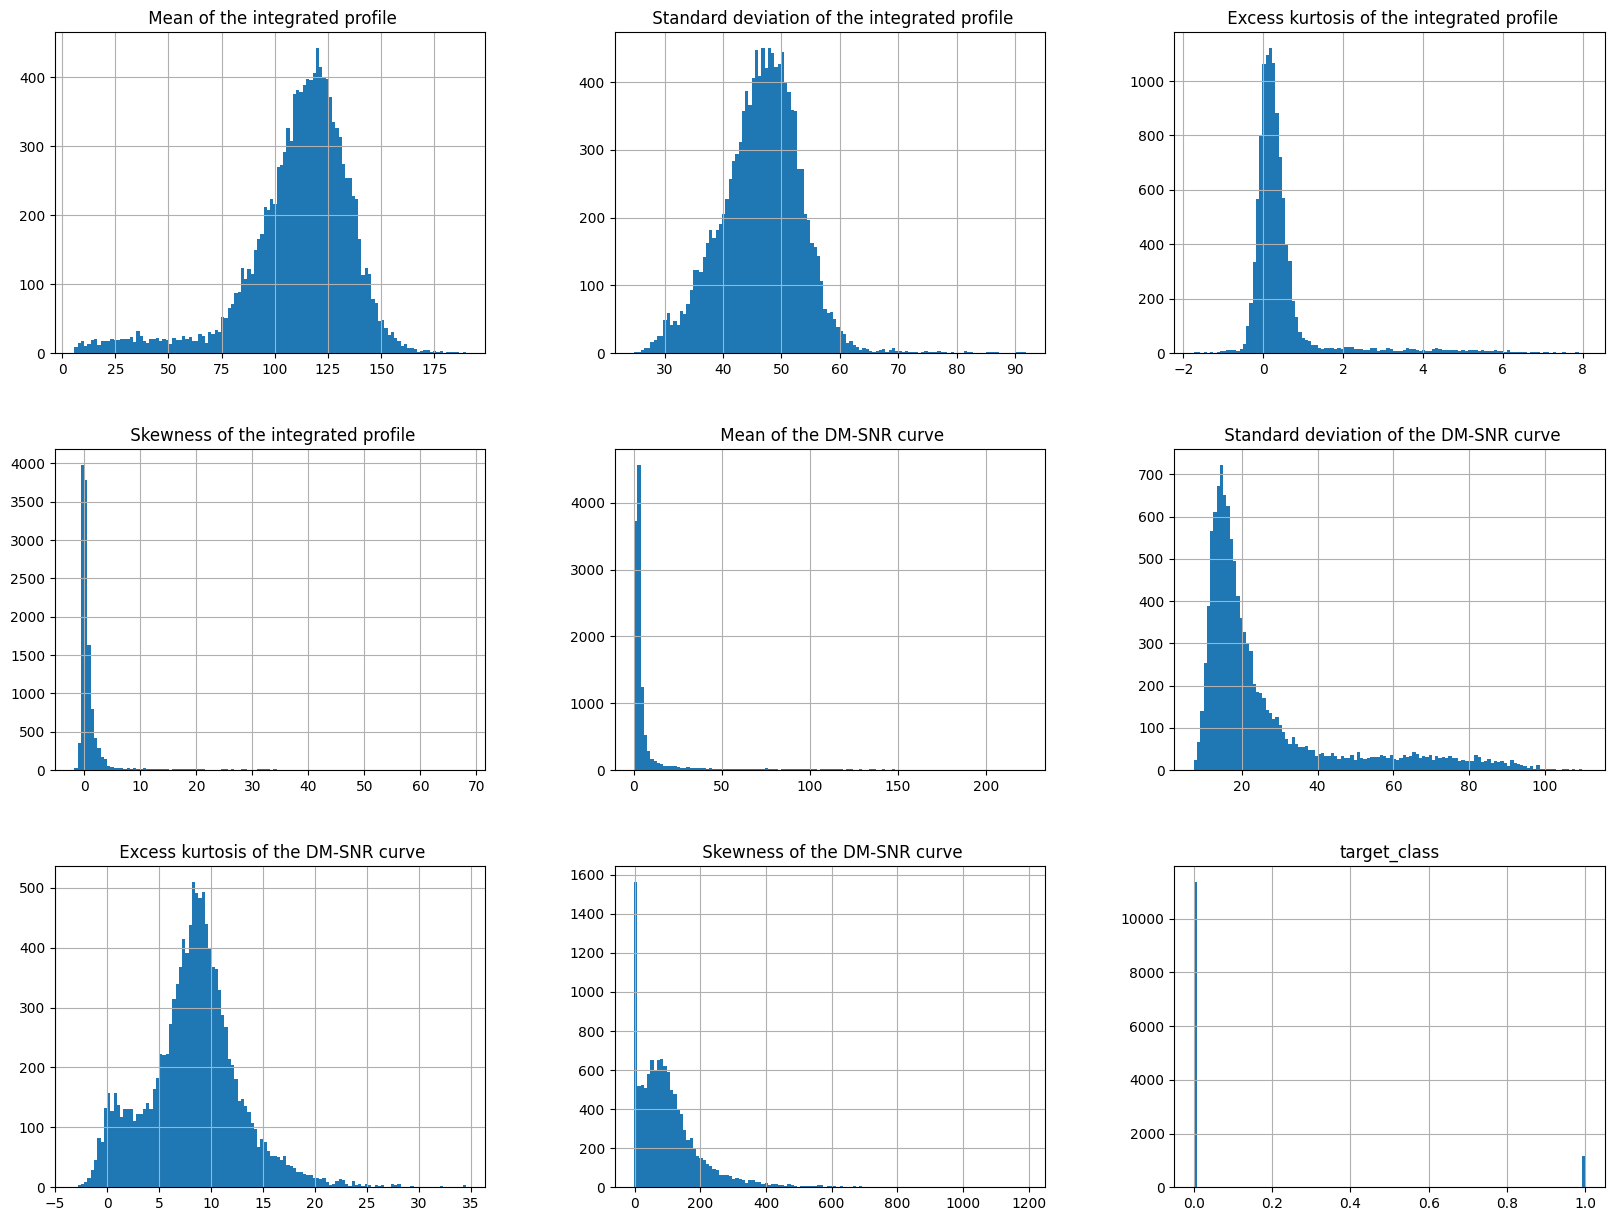

In [216]:
train_data.hist(bins=120, figsize=(20,15))
plt.show();

Plot box dari data train

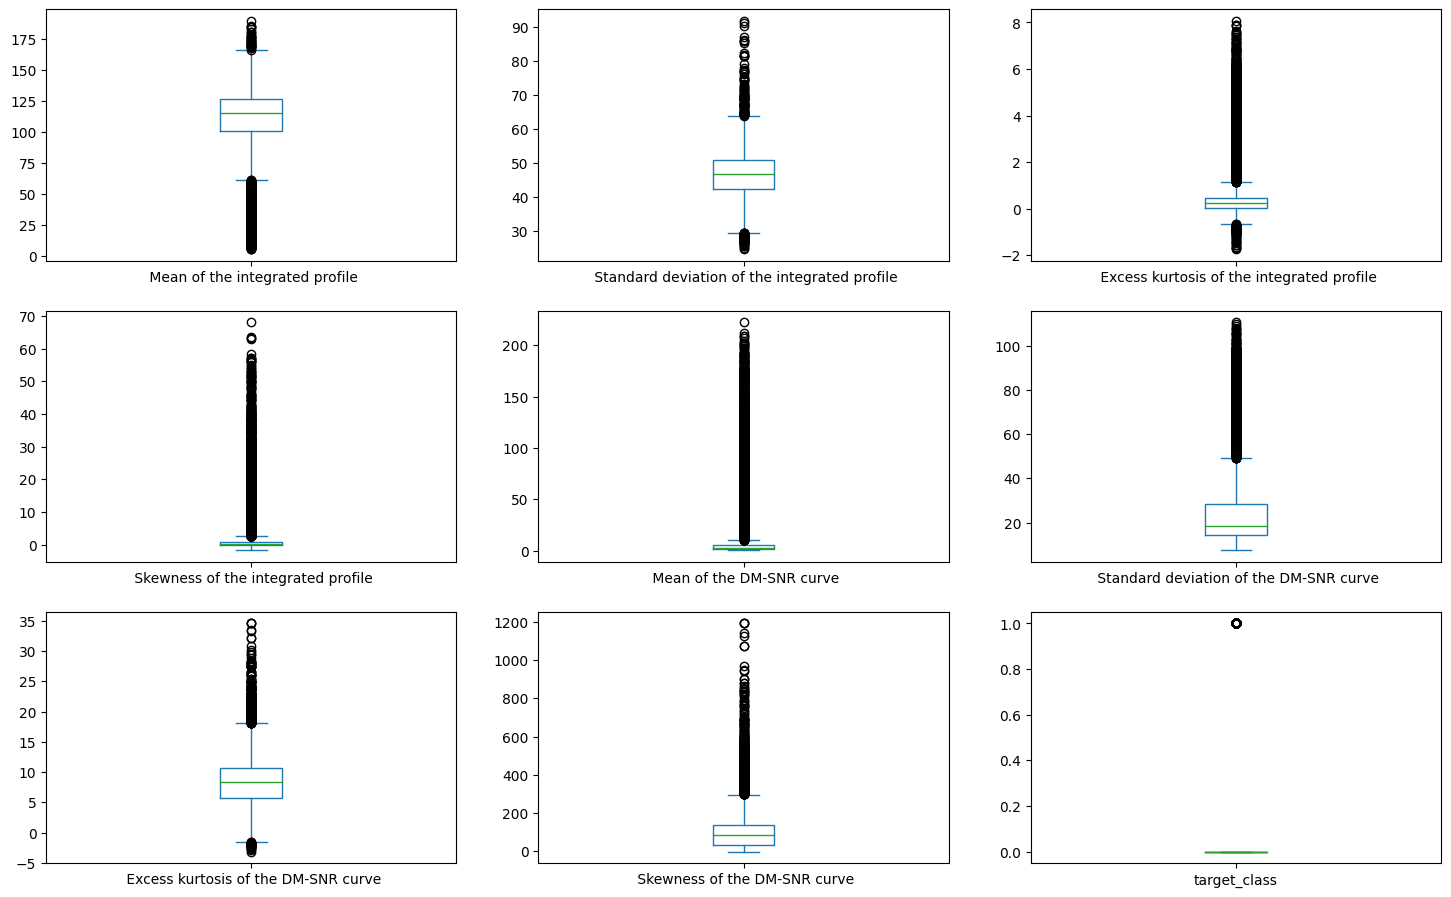

In [217]:
train_data.plot(kind = "box" , subplots = True , figsize = (18,15) ,  layout = (4,3))
plt.show()

Banyak outliner yang perlu ditangani

Melihat jumlah target class yang akan dikerjakan

In [218]:
train_data['target_class'].value_counts()

0.0    11375
1.0     1153
Name: target_class, dtype: int64

Lakukan plot pie dari data Train

<Axes: ylabel='target_class'>

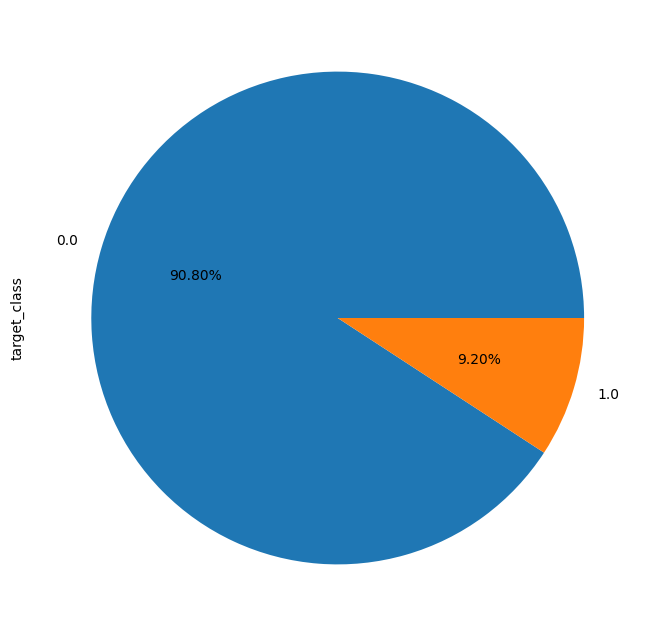

In [219]:
plt.figure(figsize=(12,8))
train_data['target_class'].value_counts(normalize = True).plot.pie(autopct = '%.2f%%')

dapat dilihat bahwa data tersebut tidak seimbang dan perlu diperbaiki

Mencari apakah ada data yang terduplikat

In [220]:
len(train_data)-len(train_data.drop_duplicates())


0

tidak ada duplikat

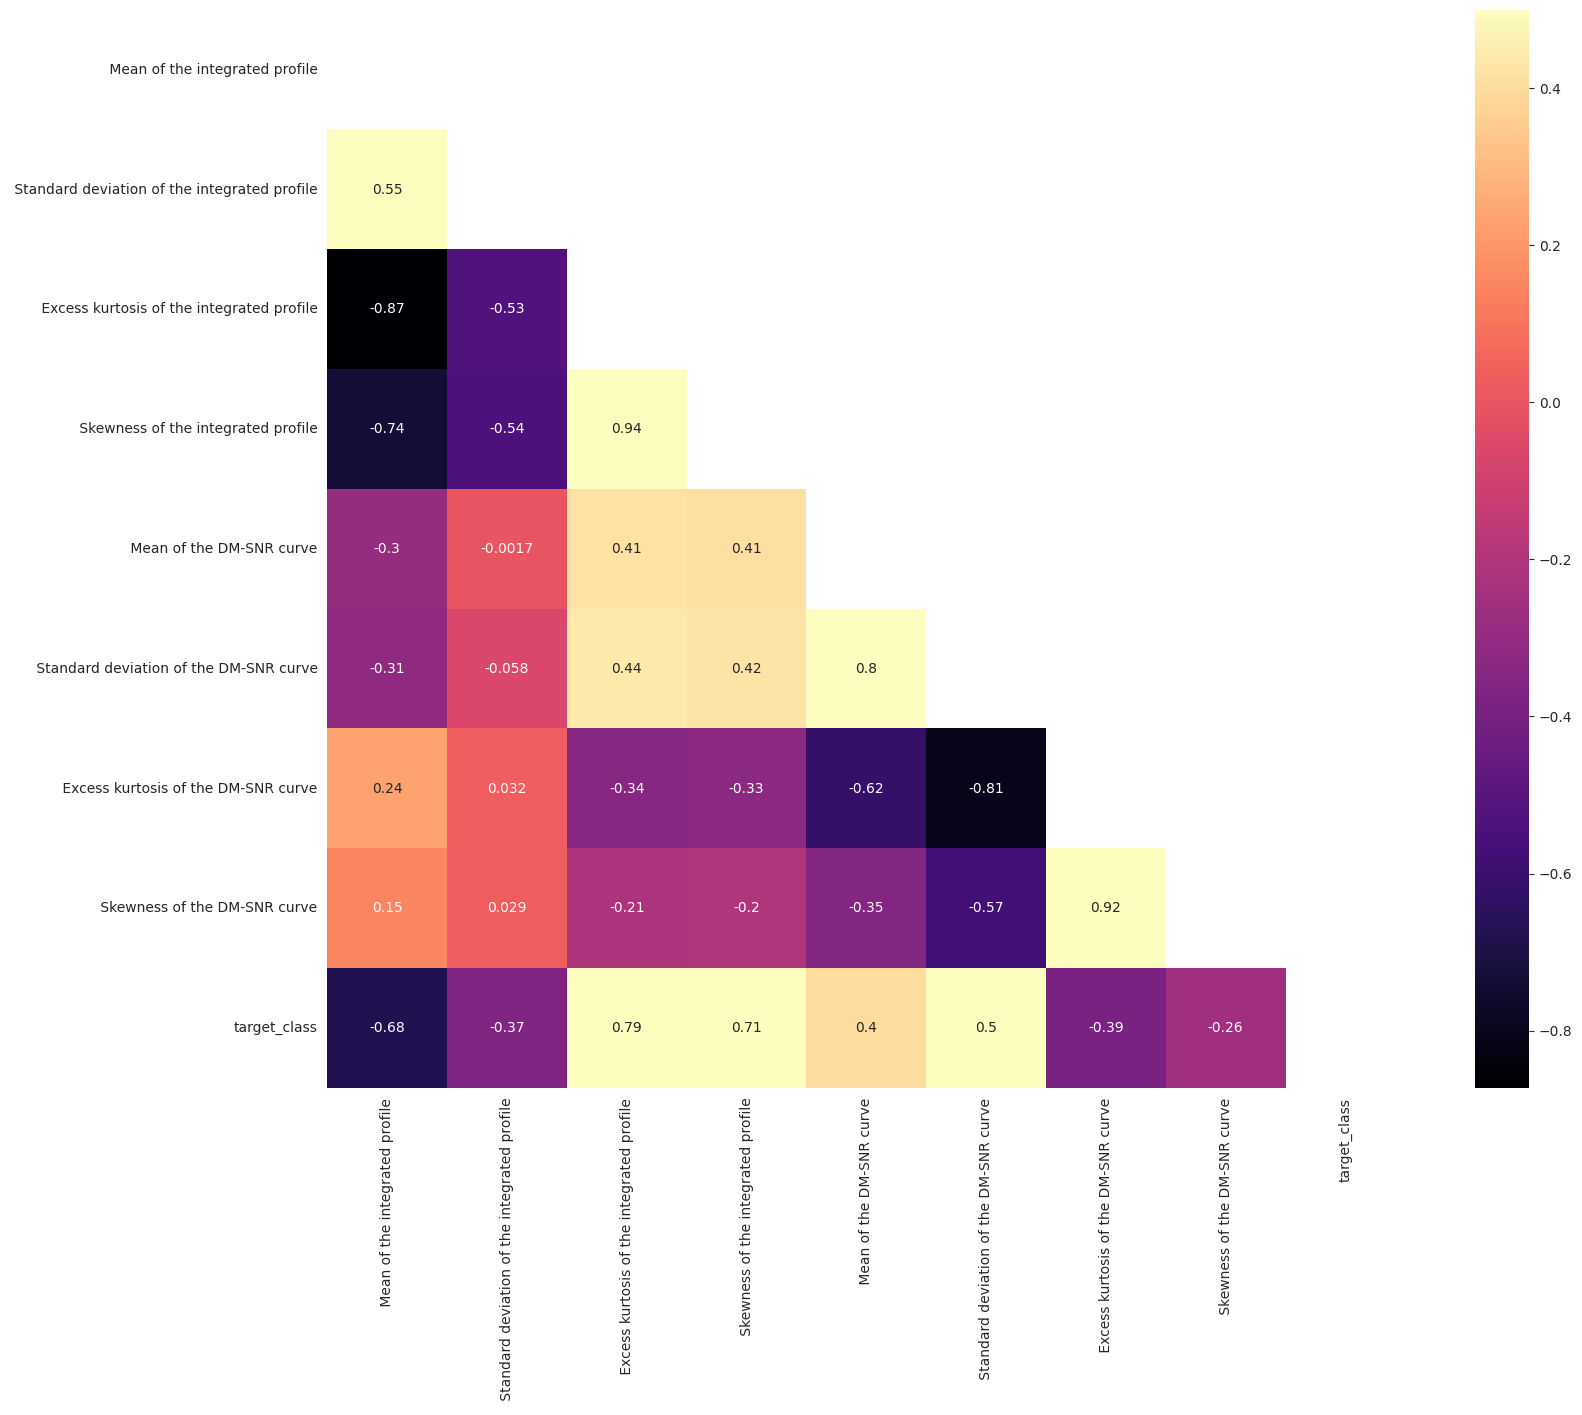

In [221]:
mask = np.zeros_like(train_data.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(18, 14))
    ax = sns.heatmap(train_data.corr(), mask=mask, vmax=.5, square=True,annot = True, cmap="magma")

# Preprocessing

## Missing values


### For train dataset

guanakan KKN untuk menangani

In [222]:
from sklearn.neighbors import KNeighborsRegressor

# function that imputes a dataframe
def impute_knn(data):

    ''' inputs: pandas df containing feature matrix '''
    ''' outputs: dataframe with NaN imputed '''
    # imputation with KNN unsupervised method

    # separate dataframe into numerical/categorical
    ldf = data.select_dtypes(include=[np.number])           # select numerical columns in df
    ldf_putaside = data.select_dtypes(exclude=[np.number])  # select categorical columns in df
    # define columns w/ and w/o missing data
    cols_nan = ldf.columns[ldf.isna().any()].tolist()         # columns w/ nan
    cols_no_nan = ldf.columns.difference(cols_nan).values     # columns w/o nan

    for col in cols_nan:
        imp_test = ldf[ldf[col].isna()]   # indicies which have missing data will become our test set
        imp_train = ldf.dropna()          # all indicies which which have no missing data
        model = KNeighborsRegressor(n_neighbors=5)  # KNR Unsupervised Approach
        knr = model.fit(imp_train[cols_no_nan], imp_train[col])
        ldf.loc[data[col].isna(), col] = knr.predict(imp_test[cols_no_nan])

    return pd.concat([ldf,ldf_putaside],axis=1)

buat data train baru

In [223]:
# Call function that imputes missing data
new_train_data = impute_knn(train_data)
# looks like we have a full feature matrix
new_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     12528 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        12528 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  12528 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


menampilkan jumlah null dari dataset yang baru

In [224]:
new_train_data.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

## Outliers

gunakan metodr IQR untuk outliner

In [225]:
#capping outliers using the IQR methode
def iqr_capping (data, coloumns, factor): # Factor = 1.5

    for col in coloumns:

        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)

        IQR = Q3 - Q1

        upper_bound = Q3 + (factor * IQR)
        lower_bound = Q1 - (factor * IQR)

        data[col]=np.where(data[col]>upper_bound, upper_bound,
                       np.where(data[col]<lower_bound, lower_bound, data[col]))


In [226]:
outliers = np.unique(iqr_capping(new_train_data, new_train_data.loc[:,:' Skewness of the DM-SNR curve'].columns , 1.5))

menampikan jumlah dari data Train baru

In [227]:
new_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     12528 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        12528 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  12528 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


Menampilkan boxplotnya

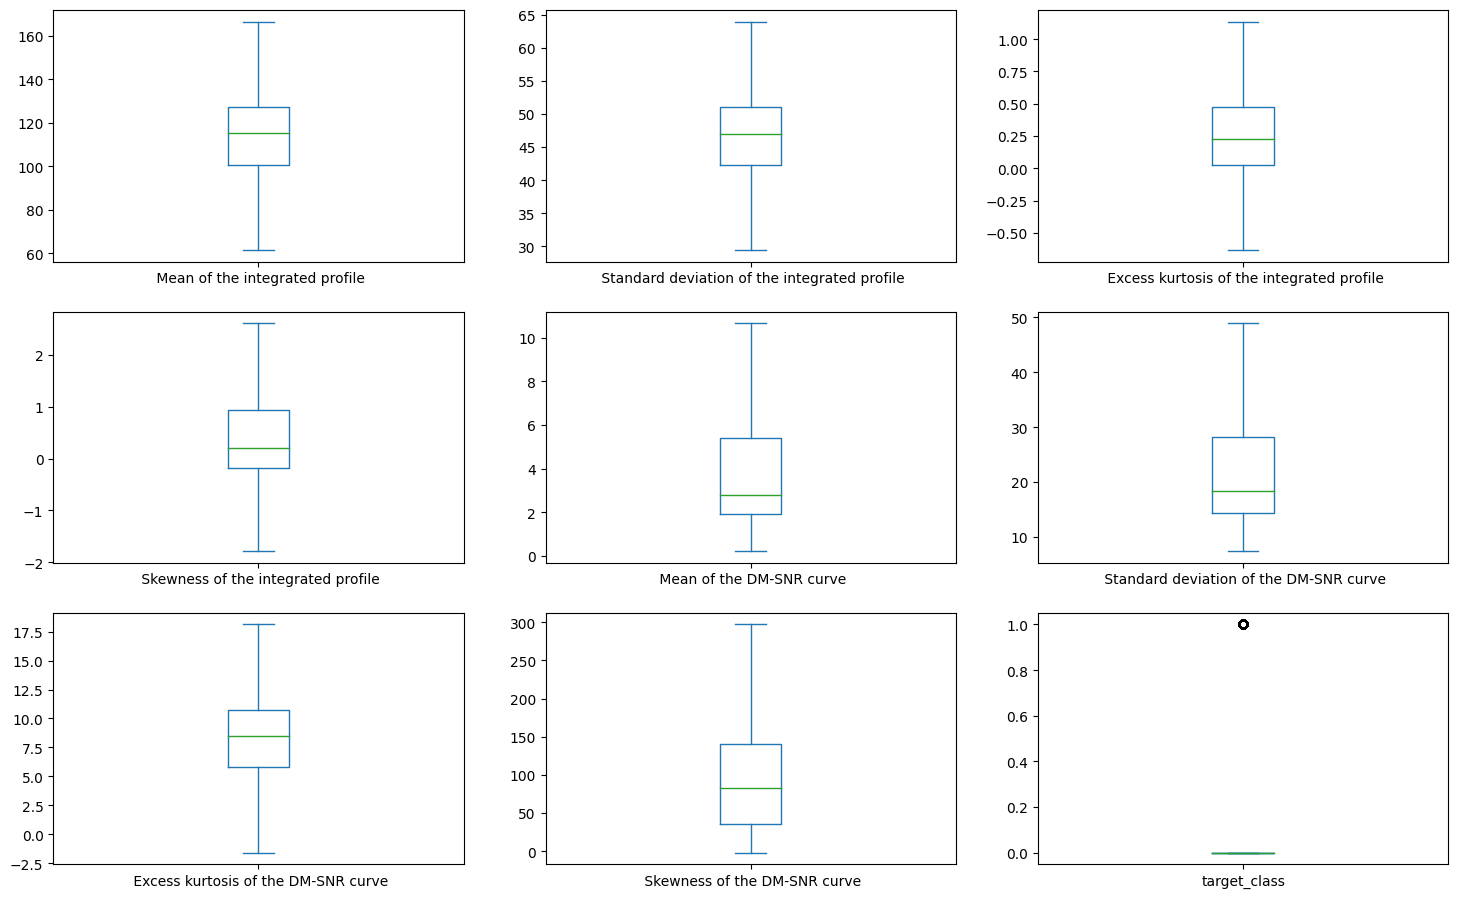

In [228]:
new_train_data.plot(kind = "box" , subplots = True , figsize = (18,15) ,  layout = (4,3))
plt.show()

menamoikan jumlah target dari data train yang baru

In [229]:
new_train_data['target_class'].value_counts()

0.0    11375
1.0     1153
Name: target_class, dtype: int64

menampilkan jumlah seluruh data

In [230]:
x= new_train_data.drop('target_class', axis = 1).values
y=new_train_data['target_class'].values
y.shape

(12528,)

## Resampling the train data

melakukan resampling menggunakan SMOTE

In [231]:
from imblearn.over_sampling import SMOTE


Gunakan metode fit

In [232]:
sm = SMOTE( random_state=42)
x_resampled, y_resampled = sm.fit_resample(x,y)

jumlah data yang telah diresampling

In [233]:
y_resampled.shape

(22750,)

menampilkan PiePlot yang baru

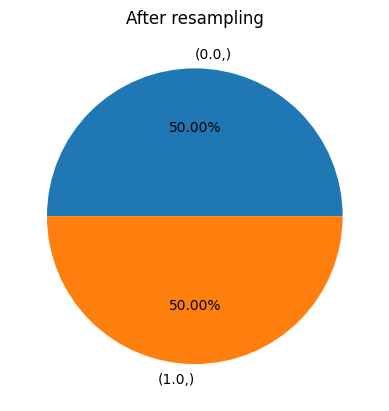

In [234]:
y_resampled_pd = pd.DataFrame(data=y_resampled)
ax =y_resampled_pd.value_counts().plot.pie(autopct = '%.2f%%')
_= ax.set_title("After resampling")

## memisahkan data

Memisahkan data untuk train dan test

In [235]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_resampled,y_resampled, test_size=0.20 , random_state=42)

### Scaling

scaing menggunkan standar scaler

In [236]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

scaling menggunakan metode fit

In [237]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

# **Memodelkan menggunakan SVM**

Import semua library yang dibutuhkan

In [238]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score,classification_report, roc_curve , roc_auc_score,roc_curve, confusion_matrix
from sklearn.svm import SVC
svm = SVC()
from sklearn.model_selection import cross_val_score

## Kernel RBF :

Coba SVM menggunakan kernel RBF

In [239]:
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train_scaled, y_train)
svm_rbf_pred = svm_rbf.predict(X_test_scaled)

print('Accuracy Score of Super Vector Machine, RBF kernel: ', accuracy_score(y_test, svm_rbf_pred))

Accuracy Score of Super Vector Machine, RBF kernel:  0.9474725274725275


memperlihatkan Classifcation reportnya

In [240]:
print(classification_report(y_test, svm_rbf_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      2305
         1.0       0.97      0.92      0.95      2245

    accuracy                           0.95      4550
   macro avg       0.95      0.95      0.95      4550
weighted avg       0.95      0.95      0.95      4550



Membuat confusion matrix

<Axes: >

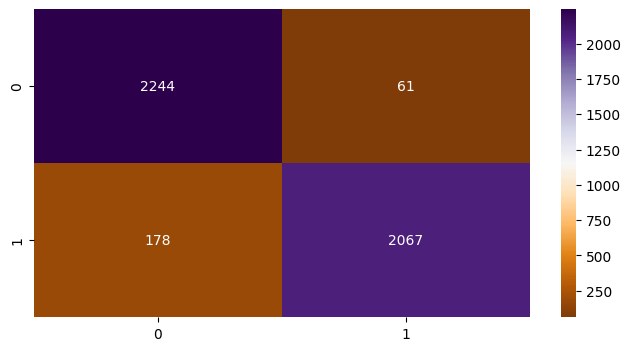

In [241]:
matrix = confusion_matrix(y_test, svm_rbf_pred)
plt.figure(figsize = (8,4))
sns.heatmap(matrix , fmt='2g',annot = True, cmap="PuOr")

Plot ROC nya

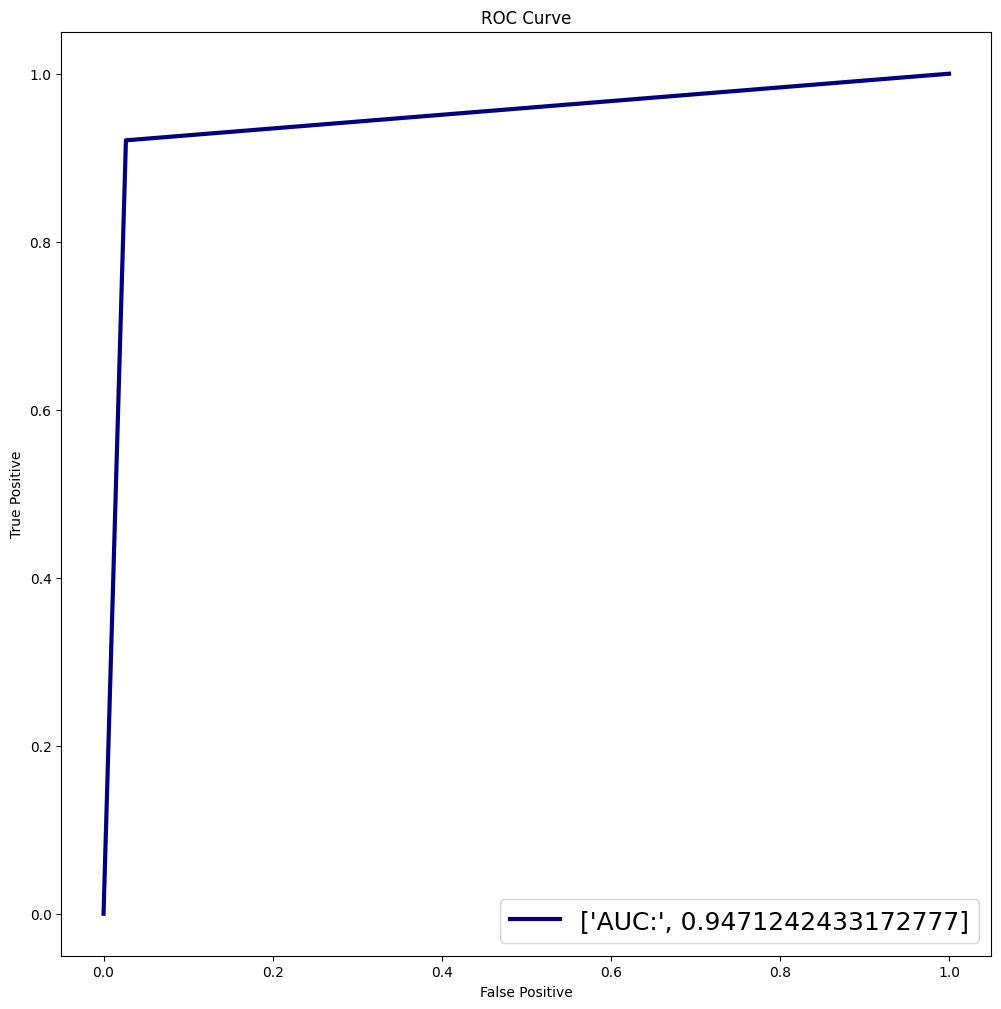

In [242]:
TPR = []
FPR = []
A = ['AUC:', roc_auc_score(y_test, svm_rbf_pred)]
FPR, TPR, thresholds = roc_curve(y_test, svm_rbf_pred)
plt.figure(figsize=(12,12))
plt.plot(FPR,TPR, label = A , lw = 3, c= "navy")
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.legend(prop={'size':18}, loc='lower right')
plt.show()

Mencari parameter terbaik menggunakan CV

In [243]:
SVM_param_rbf = {'C': 0.02*np.arange(1,20),
              'gamma': 0.02*np.arange(1,50),
              'kernel': ['rbf'],
              'tol':[0.01,0.001,0.0001],
              'degree': [2,3,4,5]}  #,'linear','poly', 'sigmoid', 'precomputed'

SVM_rbf_ = RandomizedSearchCV(svm_rbf, param_distributions = SVM_param_rbf, cv = 5, n_jobs=-1)

Menggunakan metode fit

In [244]:
SVM_rbf_.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': array([0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 , 0.22,
       0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38]),
                                        'degree': [2, 3, 4, 5],
                                        'gamma': array([0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 , 0.22,
       0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42, 0.44,
       0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64, 0.66,
       0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86, 0.88,
       0.9 , 0.92, 0.94, 0.96, 0.98]),
                                        'kernel': ['rbf'],
                                        'tol': [0.01, 0.001, 0.0001]})

Mencari dan mempperlihatkan parameter terbaiknya

In [245]:
SVM_rbf_.best_estimator_

SVC(C=0.36, gamma=0.88, tol=0.0001)

Menampilkan detail parameter terbaik yang ditemukan

In [246]:
# Best SVM_rbf_ model
SVM_rbf_bset = SVC(C=0.18,degree=2, gamma=0.5, tol=0.01, kernel='rbf', random_state=42)
SVM_rbf_bset.fit(X_train_scaled, y_train)

SVC(C=0.18, degree=2, gamma=0.5, random_state=42, tol=0.01)

Menunjukan Classification report dari parameter terbaik

In [247]:
svm_rbf_best_pred = SVM_rbf_bset.predict(X_test_scaled)
print(classification_report(y_test, svm_rbf_best_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      2305
         1.0       0.97      0.92      0.95      2245

    accuracy                           0.95      4550
   macro avg       0.95      0.95      0.95      4550
weighted avg       0.95      0.95      0.95      4550



Membuat plot confusion matrixnya

<Axes: >

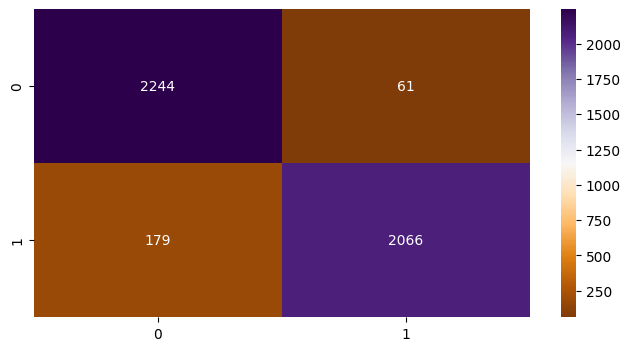

In [248]:
matrix = confusion_matrix(y_test, svm_rbf_best_pred)
plt.figure(figsize = (8,4))
sns.heatmap(matrix , fmt='2g',annot = True, cmap="PuOr")

Membuat ROC nya

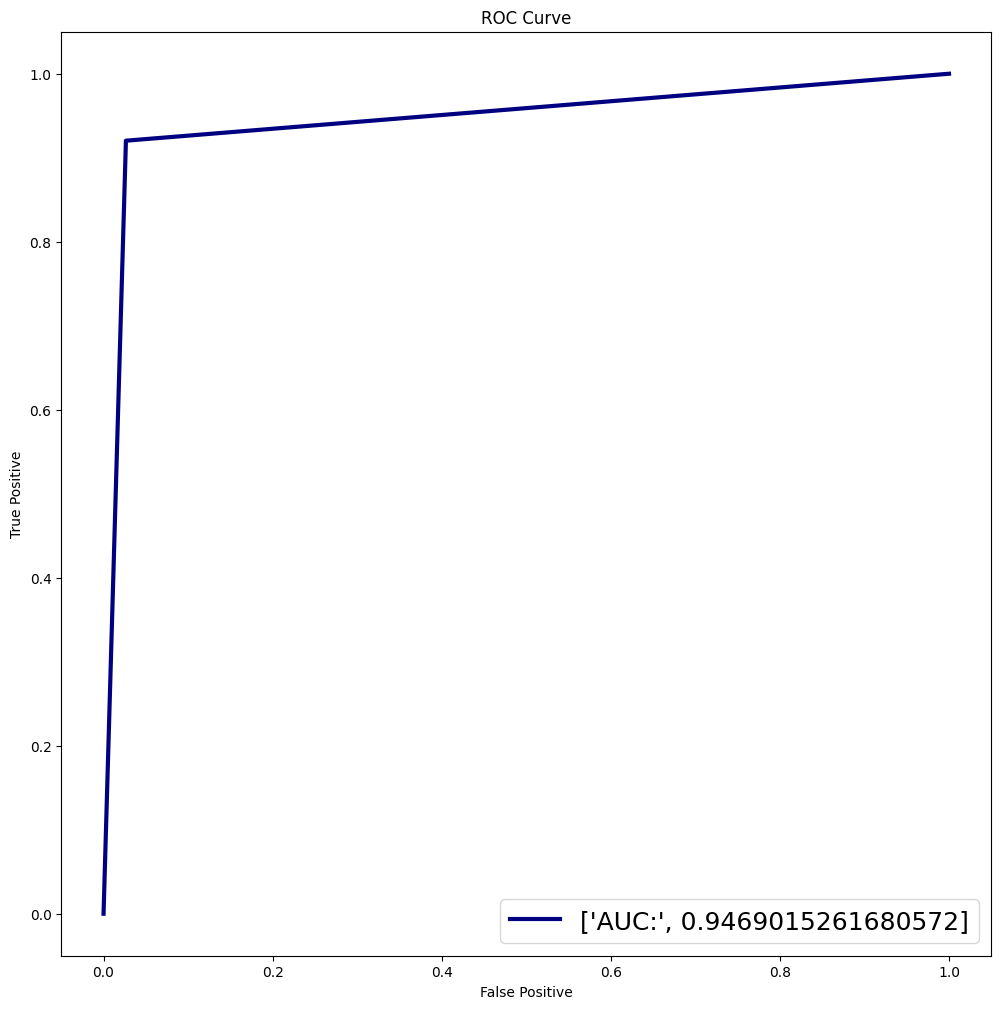

In [249]:
TPR = []
FPR = []
A = ['AUC:', roc_auc_score(y_test, svm_rbf_best_pred)]
FPR, TPR, thresholds = roc_curve(y_test, svm_rbf_best_pred)
plt.figure(figsize=(12,12))
plt.plot(FPR,TPR, label = A , lw = 3, c= "navy")
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.legend(prop={'size':18}, loc='lower right')
plt.show()

## Linear kernel

Coba menggunaan kernel linear

In [250]:
svm_linear= SVC(kernel='linear')
svm_linear.fit(X_train_scaled, y_train)
svm_linear_pred = svm_linear.predict(X_test_scaled)

print('Accuracy Score of Super Vector Machine, Linear kernel: ', accuracy_score(y_test, svm_linear_pred))


Accuracy Score of Super Vector Machine, Linear kernel:  0.9404395604395605


menunjukan classification report dari kernel Linear

In [251]:
print(classification_report(y_test, svm_linear_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      2305
         1.0       0.96      0.92      0.94      2245

    accuracy                           0.94      4550
   macro avg       0.94      0.94      0.94      4550
weighted avg       0.94      0.94      0.94      4550



Menampilkan plot confusion matrixnya

<Axes: >

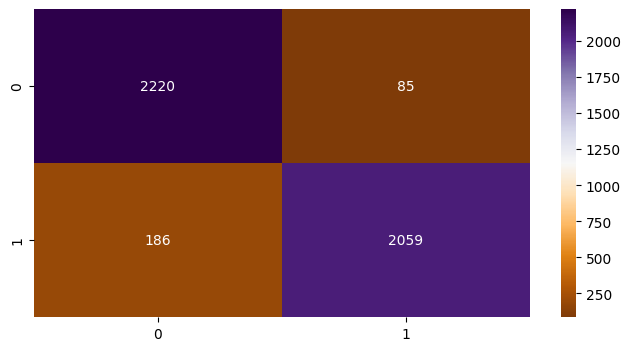

In [252]:
matrix = confusion_matrix(y_test, svm_linear_pred)
plt.figure(figsize = (8,4))
sns.heatmap(matrix , fmt='2g',annot = True, cmap="PuOr")

Menampilkan ROC nya

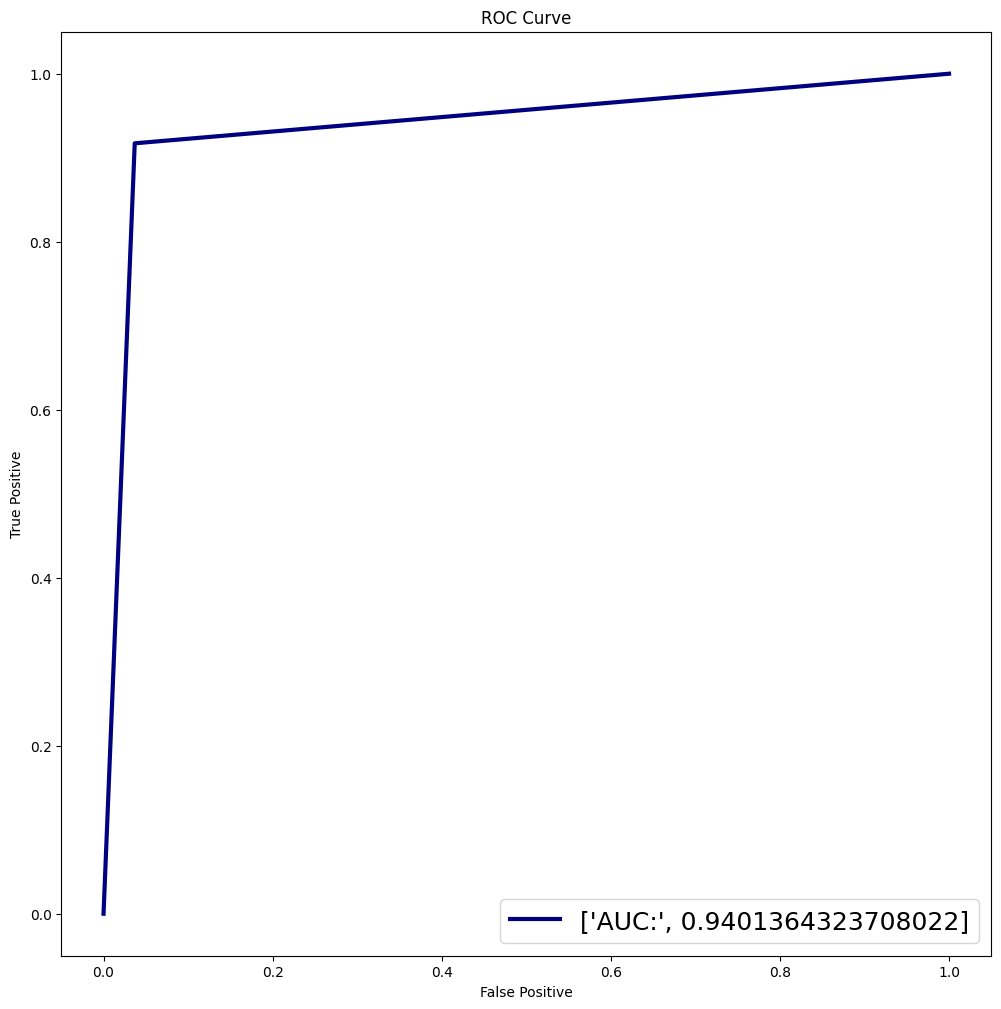

In [253]:
TPR = []
FPR = []
A = ['AUC:', roc_auc_score(y_test, svm_linear_pred)]
FPR, TPR, thresholds = roc_curve(y_test, svm_linear_pred)
plt.figure(figsize=(12,12))
plt.plot(FPR,TPR, label = A , lw = 3, c= "navy")
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.legend(prop={'size':18}, loc='lower right')
plt.show()

Mencari parameter terbaik untuk kernel Linear menggunakan SearchCV

In [254]:
SVM_param_linear = {'C': 0.02*np.arange(1,20),
              'gamma': 0.02*np.arange(1,50),
              'kernel': ['linear'],
              'tol':[0.01,0.001,0.0001],
              'degree': [2,3,4,5]}  #,'linear','poly', 'sigmoid', 'precomputed'

SVM_linear_ = RandomizedSearchCV(svm_linear, param_distributions = SVM_param_linear, cv = 5, n_jobs=-1)

Menggunakan metode fit

In [255]:
SVM_linear_.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(kernel='linear'), n_jobs=-1,
                   param_distributions={'C': array([0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 , 0.22,
       0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38]),
                                        'degree': [2, 3, 4, 5],
                                        'gamma': array([0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 , 0.22,
       0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42, 0.44,
       0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64, 0.66,
       0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86, 0.88,
       0.9 , 0.92, 0.94, 0.96, 0.98]),
                                        'kernel': ['linear'],
                                        'tol': [0.01, 0.001, 0.0001]})

Menampikan estimasi parameter terbaiknya

In [256]:
SVM_linear_.best_estimator_

SVC(C=0.22, degree=2, gamma=0.46, kernel='linear', tol=0.0001)

Menampikan detail parameter terbaiknya

In [257]:
# Best SVM_linear_ model
SVM_linear_bset = SVC(C=0.14,degree=5, gamma=0.9, tol=0.01, kernel='linear', random_state=42)
SVM_linear_bset.fit(X_train_scaled, y_train)

SVC(C=0.14, degree=5, gamma=0.9, kernel='linear', random_state=42, tol=0.01)

Menampilkan classification reportnya

In [258]:
SVM_linear_bset_pred = SVM_linear_bset.predict(X_test_scaled)
print(classification_report(y_test, SVM_linear_bset_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94      2305
         1.0       0.96      0.92      0.94      2245

    accuracy                           0.94      4550
   macro avg       0.94      0.94      0.94      4550
weighted avg       0.94      0.94      0.94      4550



Menampilkan confusion matriknya

<Axes: >

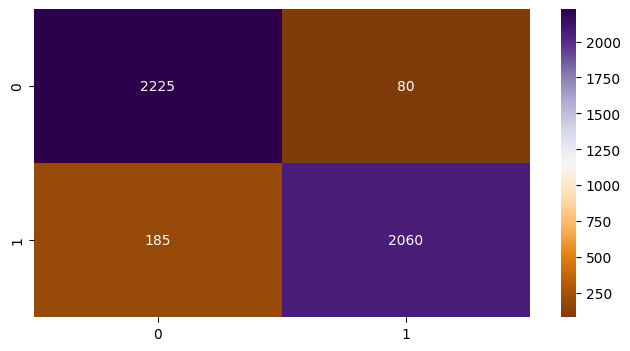

In [259]:
matrix = confusion_matrix(y_test, SVM_linear_bset_pred)
plt.figure(figsize = (8,4))
sns.heatmap(matrix , fmt='2g',annot = True, cmap="PuOr")

Menampilkan ROC nya

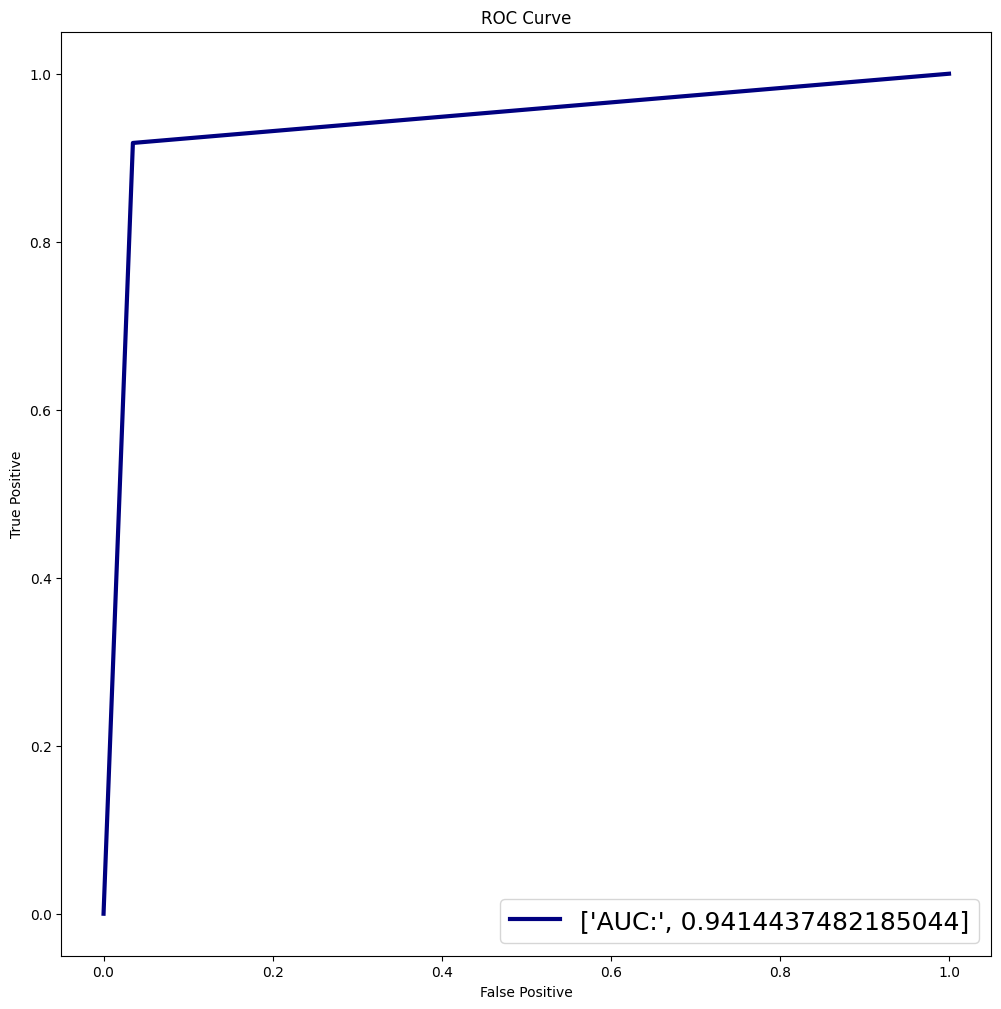

In [260]:
TPR = []
FPR = []
A = ['AUC:', roc_auc_score(y_test, SVM_linear_bset_pred)]
FPR, TPR, thresholds = roc_curve(y_test, SVM_linear_bset_pred)
plt.figure(figsize=(12,12))
plt.plot(FPR,TPR, label = A , lw = 3, c= "navy")
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.legend(prop={'size':18}, loc='lower right')
plt.show()

-----------------------------------------------------------

# untuk test dataset:

In [261]:
test_data

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,116.906250,48.920605,0.186046,-0.129815,3.037625,17.737102,8.122621,78.813405,NaN
1,75.585938,34.386254,2.025498,8.652913,3.765050,21.897049,7.048189,55.878791,NaN
2,103.273438,46.996628,0.504295,0.821088,2.244983,15.622566,9.330498,105.134941,NaN
3,101.078125,48.587487,1.011427,1.151870,81.887960,81.464136,0.485105,-1.117904,NaN
4,113.226562,48.608804,0.291538,0.292120,6.291806,26.585056,4.540138,21.708268,NaN
...,...,...,...,...,...,...,...,...,...
5365,116.531250,51.140269,-0.001220,-0.184189,4.510870,26.599514,6.634989,45.362390,NaN
5366,114.976562,53.783052,0.377599,-0.155708,2.772575,20.838488,8.440796,77.355028,NaN
5367,136.171875,48.924385,NaN,0.063227,2.810201,18.695230,7.848577,69.388978,NaN
5368,106.500000,49.066122,0.245742,0.140377,2.331104,15.417568,9.008041,100.367616,NaN


menampilkan data testnya

In [262]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5370 entries, 0 to 5369
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                5370 non-null   float64
 1    Standard deviation of the integrated profile  5370 non-null   float64
 2    Excess kurtosis of the integrated profile     4603 non-null   float64
 3    Skewness of the integrated profile            5370 non-null   float64
 4    Mean of the DM-SNR curve                      5370 non-null   float64
 5    Standard deviation of the DM-SNR curve        4846 non-null   float64
 6    Excess kurtosis of the DM-SNR curve           5370 non-null   float64
 7    Skewness of the DM-SNR curve                  5126 non-null   float64
 8   target_class                                   0 non-null      float64
dtypes: float64(9)
memory usage: 377.7 KB


Mencari dan menunjukan jumlah data kosong (null0

In [263]:
test_data.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile        767
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve           524
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     244
target_class                                     5370
dtype: int64

Mendeklarasikan Test data nya

In [264]:
X = test_data.drop('target_class', axis=1)
y = test_data[['target_class']]

### Impute missing values using KNN

In [265]:
new_test_data = impute_knn(X)
new_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5370 entries, 0 to 5369
Data columns (total 8 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                5370 non-null   float64
 1    Standard deviation of the integrated profile  5370 non-null   float64
 2    Excess kurtosis of the integrated profile     5370 non-null   float64
 3    Skewness of the integrated profile            5370 non-null   float64
 4    Mean of the DM-SNR curve                      5370 non-null   float64
 5    Standard deviation of the DM-SNR curve        5370 non-null   float64
 6    Excess kurtosis of the DM-SNR curve           5370 non-null   float64
 7    Skewness of the DM-SNR curve                  5370 non-null   float64
dtypes: float64(8)
memory usage: 335.8 KB


menampilkan jumlah data null baru

In [266]:
new_test_data.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
dtype: int64

Plot box dari data test baru

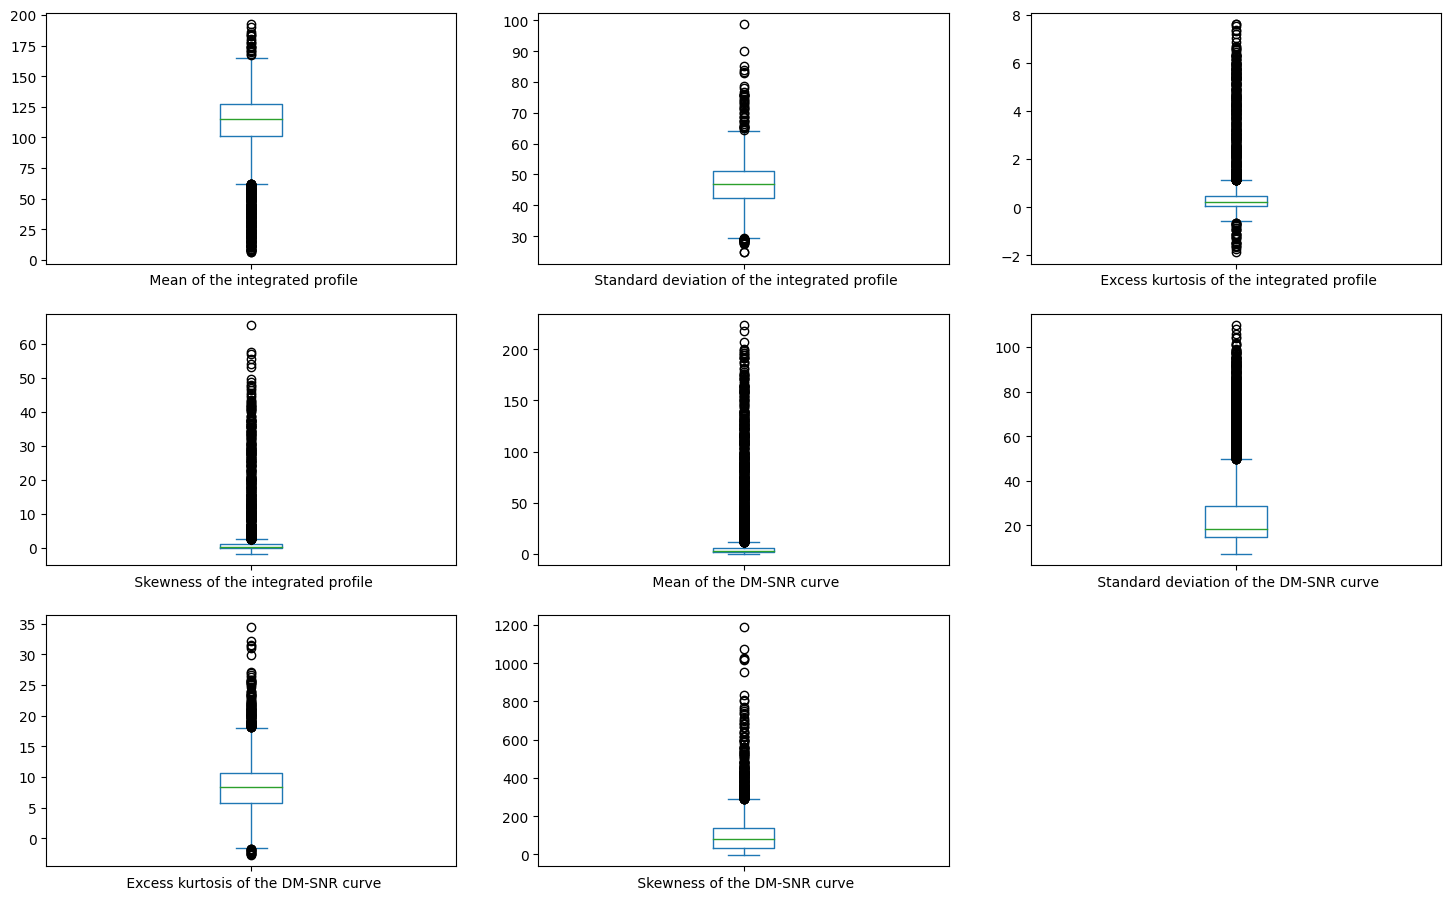

In [267]:
new_test_data.plot(kind = "box" , subplots = True , figsize = (18,15) ,  layout = (4,3))
plt.show()

### Menangani outliner

Mengidentifikasi nilai-nilai outlier dalam dataset menggunakan metode IQR

In [268]:
outliers = np.unique(iqr_capping(new_test_data, new_test_data.loc[:,:' Skewness of the DM-SNR curve'].columns , 1.5))

Menampilkan boxplot yang baru

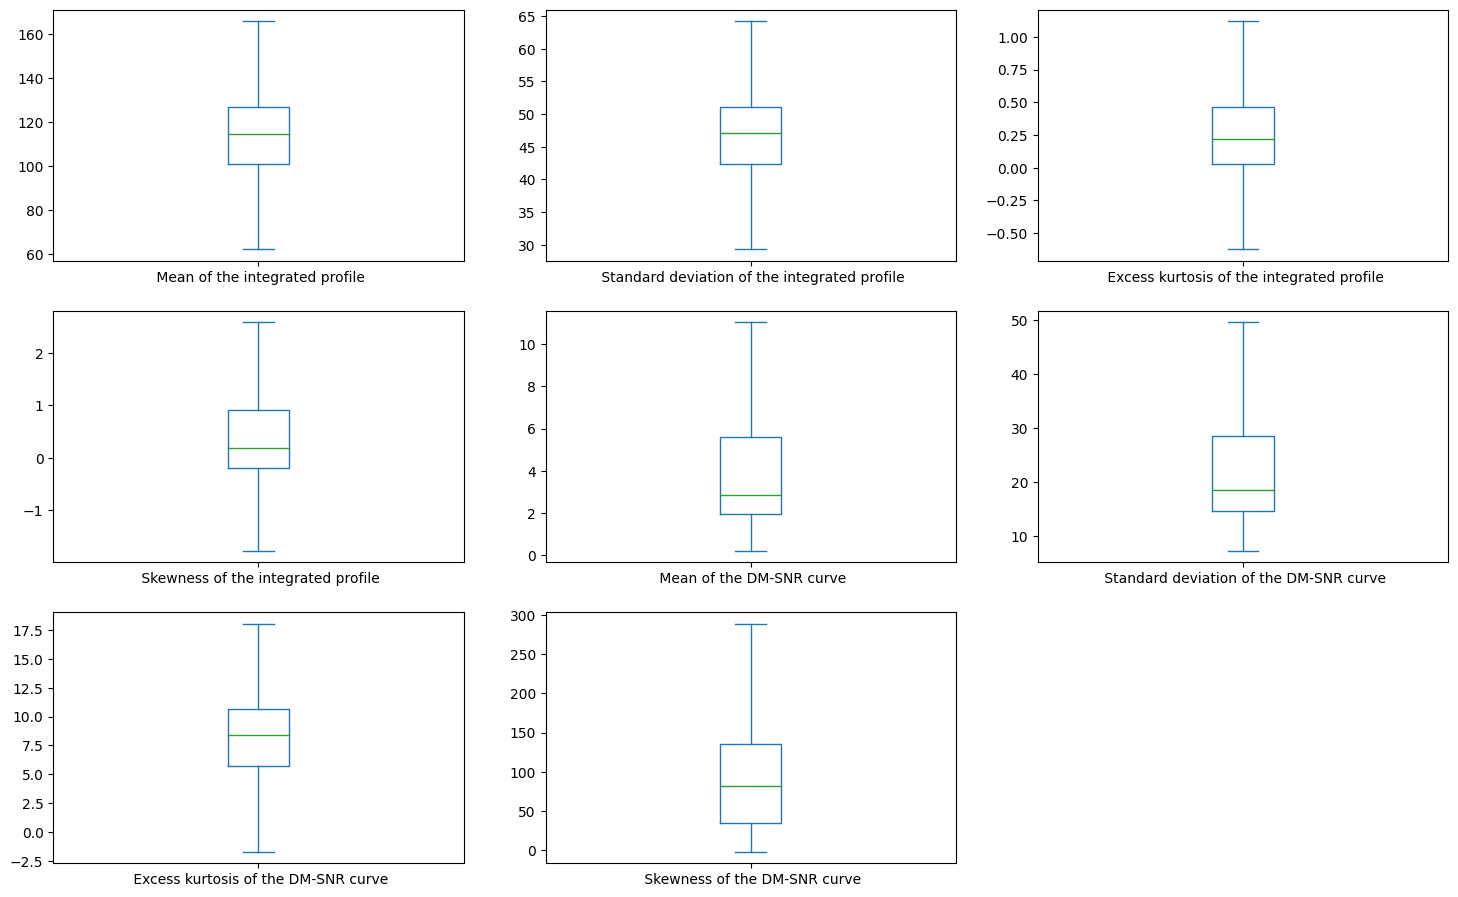

In [269]:
new_test_data.plot(kind = "box" , subplots = True , figsize = (18,15) ,  layout = (4,3))
plt.show()

Scaling

Melakukan scaling dari data baru

In [270]:
test_data_scaled = sc.transform(new_test_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Prediction

Menunjukan prediksi dari data baru

In [271]:
predictions = SVM_linear_bset.predict(test_data_scaled)
predictions

array([0., 1., 0., ..., 0., 0., 0.])

# Refrences:


*   https://www.youtube.com/watch?v=ADY2co093vY
*   https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
*   https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html
*   https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

